Enter the dimension of the matrix: 3

Randomly generated non-Hermitian matrix A:
[[0.96901483+0.89052492j 0.95260381+0.08046087j 0.45055488+0.9355804j ]
 [0.88095164+0.12000567j 0.50607274+0.42249385j 0.49674484+0.88450827j]
 [0.2214892 +0.92113753j 0.8571339 +0.13176881j 0.92481055+0.3865396j ]]


<ipython-input-1-aba2ea6a0003>:213: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(iterations_dict.keys(), rotation=30)


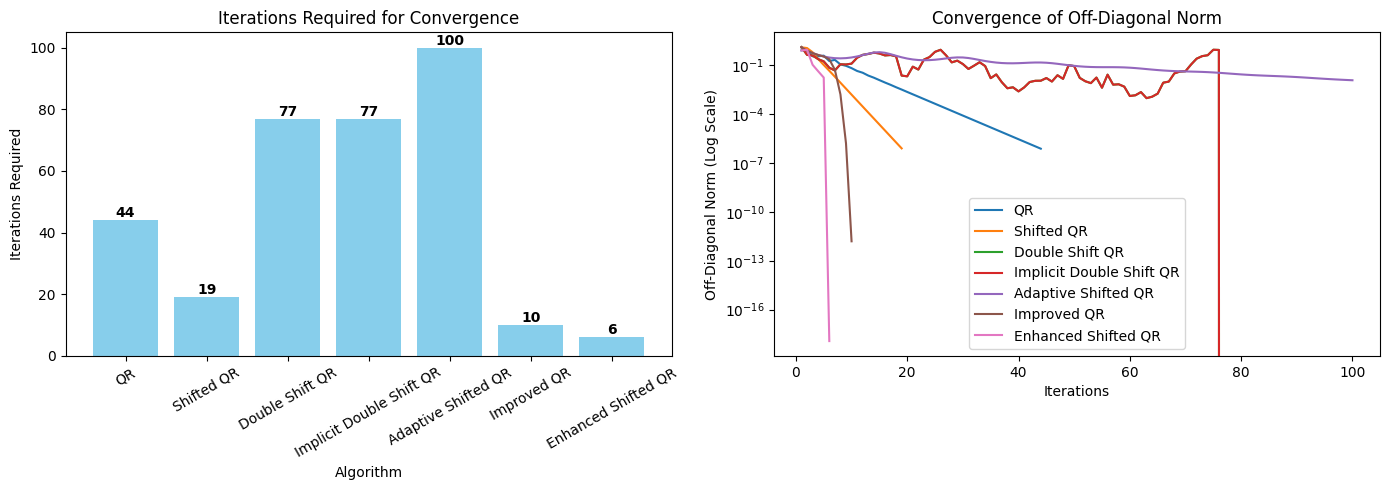

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a random non-Hermitian matrix
def generate_non_hermitian_matrix(dim):
    while True:
        A = np.random.rand(dim, dim) + 1j * np.random.rand(dim, dim)  # Complex matrix
        if not np.allclose(A, A.conj().T, atol=1e-10):  # Ensure it's not Hermitian
            return A

# Define QR Algorithm Variants
def qr_algorithm(A, max_iterations=100, tol=1e-6):
    Ak = np.copy(A)
    iterations = 0
    off_diag_norms = []

    for _ in range(max_iterations):
        Q, R = np.linalg.qr(Ak)
        Ak = R @ Q
        off_diag_norm = np.linalg.norm(np.tril(Ak, -1))
        off_diag_norms.append(off_diag_norm)
        iterations += 1
        if off_diag_norm < tol:
            break

    return np.diag(Ak), iterations, off_diag_norms

def shifted_qr_algorithm(A, max_iterations=100, tol=1e-6):
    Ak = np.copy(A)
    iterations = 0
    off_diag_norms = []

    for _ in range(max_iterations):
        mu = Ak[-1, -1]
        shifted_A = Ak - mu * np.eye(A.shape[0])
        Q, R = np.linalg.qr(shifted_A)
        Ak = R @ Q + mu * np.eye(A.shape[0])
        off_diag_norm = np.linalg.norm(np.tril(Ak, -1))
        off_diag_norms.append(off_diag_norm)
        iterations += 1
        if off_diag_norm < tol:
            break

    return np.diag(Ak), iterations, off_diag_norms


def double_shift_qr_algorithm(A, max_iterations=100, tol=1e-6):
    n = A.shape[0]
    Ak = np.copy(A)
    iterations = 0
    off_diag_norms = []

    for i in range(max_iterations):
        M = Ak[-2:, -2:]
        eigenvalues, _ = np.linalg.eig(M)
        for mu in eigenvalues:
            shifted_A = Ak - mu * np.eye(n)
            Q, R = np.linalg.qr(shifted_A)
            Ak = R @ Q + mu * np.eye(n)
        off_diag_norm = np.linalg.norm(np.tril(Ak, -1))
        off_diag_norms.append(off_diag_norm)
        iterations += 1
        if off_diag_norm < tol:
            break

    return np.diag(Ak), iterations, off_diag_norms

def implicit_double_shift_qr_algorithm(A, max_iterations=100, tol=1e-6):
    n = A.shape[0]
    Ak = np.copy(A)
    iterations = 0
    off_diag_norms = []

    for i in range(max_iterations):
        M = Ak[-2:, -2:]
        eigenvalues, _ = np.linalg.eig(M)
        for mu in eigenvalues:
            shifted_A = Ak - mu * np.eye(n)
            Q, R = np.linalg.qr(shifted_A)
            Ak = R @ Q + mu * np.eye(n)
        off_diag_norm = np.linalg.norm(np.tril(Ak, -1))
        off_diag_norms.append(off_diag_norm)
        iterations += 1
        if off_diag_norm < tol:
            break

    return np.diag(Ak), iterations, off_diag_norms

def adaptive_shifted_qr_algorithm(A, max_iterations=100, tol=1e-6):
    n = A.shape[0]
    Ak = np.copy(A)
    iterations = 0
    off_diag_norms = []

    for i in range(max_iterations):
        v = Ak[-1]
        mu = (v.conj().T @ Ak @ v) / (v.conj().T @ v)
        shifted_A = Ak - mu * np.eye(n)
        Q, R = np.linalg.qr(shifted_A)
        Ak = R @ Q + mu * np.eye(n)
        off_diag_norm = np.linalg.norm(np.tril(Ak, -1))
        off_diag_norms.append(off_diag_norm)
        iterations += 1
        if off_diag_norm < tol:
            break

    return np.diag(Ak), iterations, off_diag_norms


def improved_qr_algorithm(A, max_iterations=100, tol=1e-6, deflation_tol=1e-10):
    n = A.shape[0]
    Ak = np.copy(A)
    iterations = 0
    off_diag_norms = []

    for i in range(max_iterations):
        for j in range(n-1, 0, -1):
            if abs(Ak[j, j-1]) < deflation_tol:
                Ak = Ak[:j, :j]
                n = Ak.shape[0]
                break

        if n == 1:
            break

        v = Ak[-1]
        mu = (v.conj().T @ Ak @ v) / (v.conj().T @ v)
        shifted_A = Ak - mu * np.eye(n)
        Q, R = np.linalg.qr(shifted_A)
        Ak = R @ Q + mu * np.eye(n)

        off_diag_norm = np.linalg.norm(np.tril(Ak, -1))
        off_diag_norms.append(off_diag_norm)
        iterations += 1
        if off_diag_norm < tol:
            break

    return np.diag(Ak), iterations, off_diag_norms

def enhanced_shifted_qr_algorithm(A, max_iterations=100, tol=1e-6, deflation_tol=1e-10):
    n = A.shape[0]
    Ak = np.copy(A)
    iterations = 0
    off_diag_norms = []

    for i in range(max_iterations):
        for j in range(n - 1, 0, -1):
            if np.linalg.norm(Ak[j, :j]) < deflation_tol:
                Ak = Ak[:j, :j]
                n = j
                break

        if n == 1:
            break

        a, b, c, d = Ak[-2, -2], Ak[-2, -1], Ak[-1, -2], Ak[-1, -1]
        trace, det = a + d, a * d - b * c
        delta = np.sqrt(trace**2 - 4 * det)
        mu = (trace + delta) / 2 if abs((trace + delta) - d) < abs((trace - delta) - d) else (trace - delta) / 2

        shifted_A = Ak - mu * np.eye(n)
        Q, R = np.linalg.qr(shifted_A)
        Ak = R @ Q + mu * np.eye(n)

        off_diag_norm = np.linalg.norm(np.tril(Ak, -1))
        off_diag_norms.append(off_diag_norm)
        iterations += 1
        if off_diag_norm < tol:
            break

    return np.diag(Ak), iterations, off_diag_norms
n = int(input("Enter the dimension of the matrix: "))

while True:
    A = np.random.rand(n, n) + 1j * np.random.rand(n, n)
    if not np.allclose(A, A.conj().T, atol=1e-10):
          break
    else:
          print("Generated matrix was Hermitian. Regenerating a random non-Hermitian matrix...")

print("\nRandomly generated non-Hermitian matrix A:")
print(A)

# Generate test matrix

algorithms = {
    "QR": qr_algorithm,
    "Shifted QR": shifted_qr_algorithm,
    "Double Shift QR": double_shift_qr_algorithm,
    "Implicit Double Shift QR": implicit_double_shift_qr_algorithm,
    "Adaptive Shifted QR": adaptive_shifted_qr_algorithm,
    "Improved QR": improved_qr_algorithm,
    "Enhanced Shifted QR": enhanced_shifted_qr_algorithm
}

iterations_dict = {}
convergence_logs = {}

# Apply algorithms
for name, algo in algorithms.items():
    _, iterations, off_diag_norms = algo(A)
    iterations_dict[name] = iterations
    convergence_logs[name] = off_diag_norms

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Iterations Required for Convergence with exact numbers on bars
bars = axes[0].bar(iterations_dict.keys(), iterations_dict.values(), color='skyblue')
axes[0].set_xlabel("Algorithm")
axes[0].set_ylabel("Iterations Required")
axes[0].set_title("Iterations Required for Convergence")
axes[0].set_xticklabels(iterations_dict.keys(), rotation=30)

# Annotate bars with iteration numbers
for bar in bars:
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Convergence of Off-Diagonal Norms (Log Scale)
for name, norms in convergence_logs.items():
    axes[1].plot(range(1, len(norms) + 1), norms, label=name)

axes[1].set_xlabel("Iterations")
axes[1].set_ylabel("Off-Diagonal Norm (Log Scale)")
axes[1].set_yscale("log")
axes[1].set_title("Convergence of Off-Diagonal Norm")
axes[1].legend()

plt.tight_layout()
plt.show()

